In [1]:
#hide
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
plt.style.use(matplotlib_style)

from sklearn.utils import shuffle
import random
from fastprogress.fastprogress import master_bar, progress_bar

plt.rcParams['figure.figsize'] = 16,5

%load_ext autoreload
%autoreload 2

In [2]:
from thompson_sampling.helpers import plot_regret

In [3]:
theta = [0.6, 0.3]

theta_contextual = [1.6, 0.4]


num_data = 1500
X = np.linspace(-6, 6, num_data)
X = shuffle(X)
noise = 0.1


# Project name here

> Summary description here.

This file will become your README and also the index of your documentation.

## Install

`pip install your_project_name`

## How to use

Fill me in please! Don't forget code examples:

# Categorical Reward

This section deals with rewards of categorical nature, i.e. yes/no, 0/1, ...

Note that our approaches are only built to take two categories. 

### non-contextual case

The non-contextual case does.. well... not use context.

In [4]:
from thompson_sampling.multi_armed_bandits import non_contextual_categorical_bandit

In [5]:
from thompson_sampling.solvers import BetaBandit

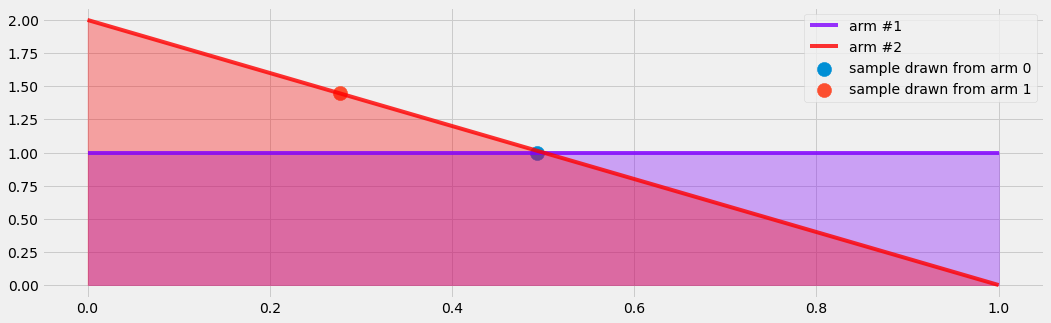

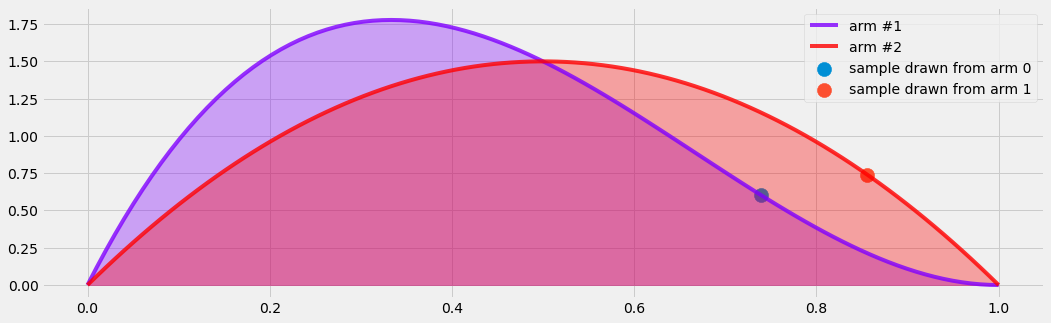

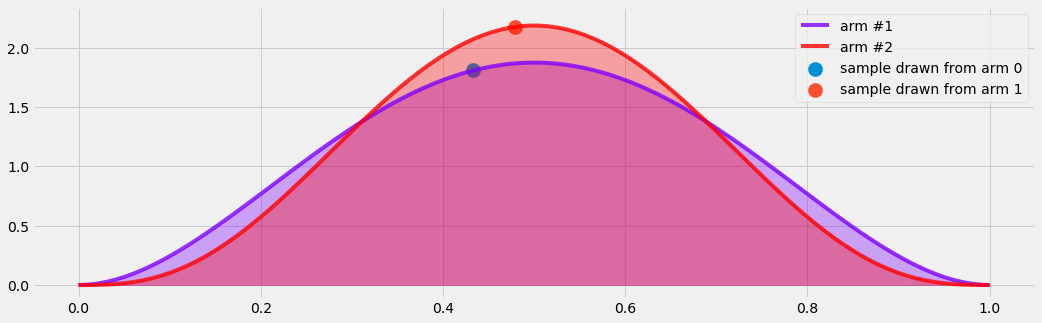

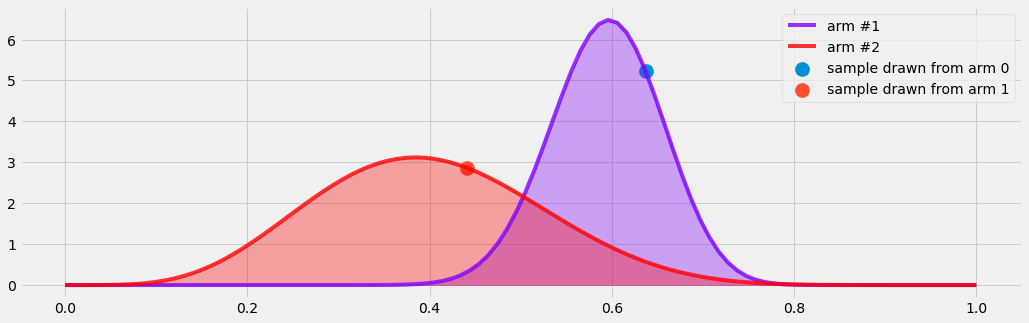

In [6]:

bb = BetaBandit()

y_optimal_list = []
y_hat_list= []
for i in range(250):
    if i in [1,5,10,75,250]:
        plt.figure()
        arm = bb.choose_arm_and_plot()
    else:
        arm = bb.choose_arm()
    reward = non_contextual_categorical_bandit(arm,theta)
    bb.update(arm,reward)
    y_hat_list.append(int(reward))
        
    y_optimal = non_contextual_categorical_bandit(np.argmax(theta),theta)
    y_optimal_list.append(y_optimal)


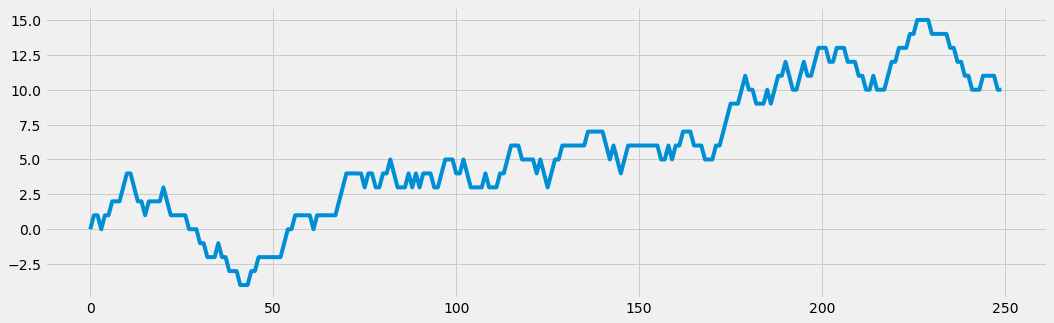

In [7]:
plot_regret(y_optimal_list, y_hat_list)

## contextual Case

In [8]:
from thompson_sampling.multi_armed_bandits import contextual_categorical_bandit, contextual_categorical_get_optimal_arm

#### BONUS: contextual bandit with noncontextual solver

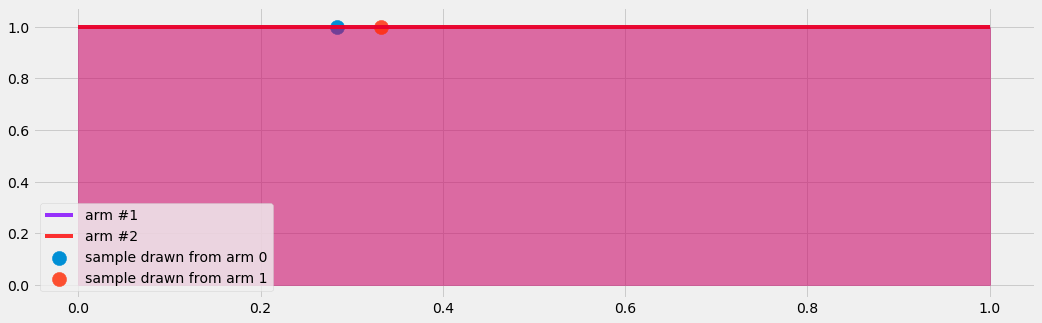

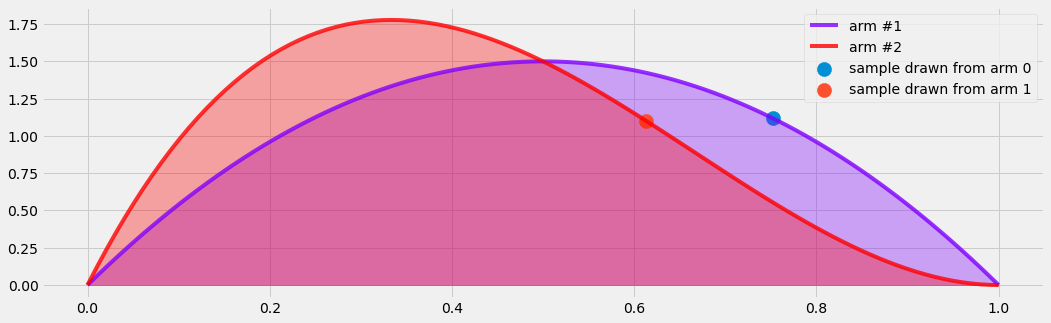

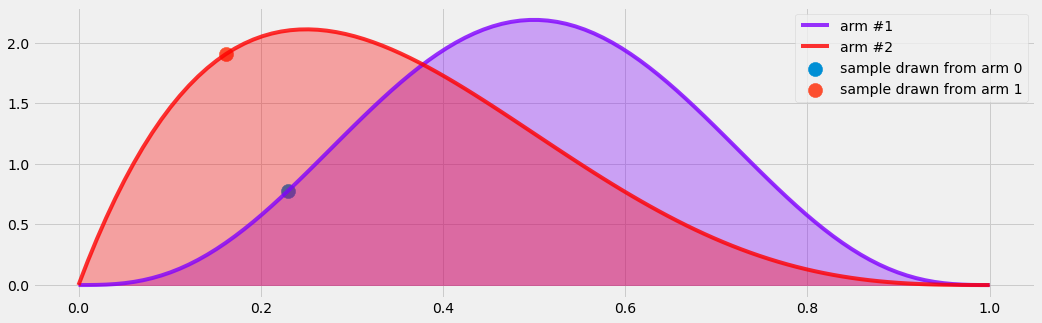

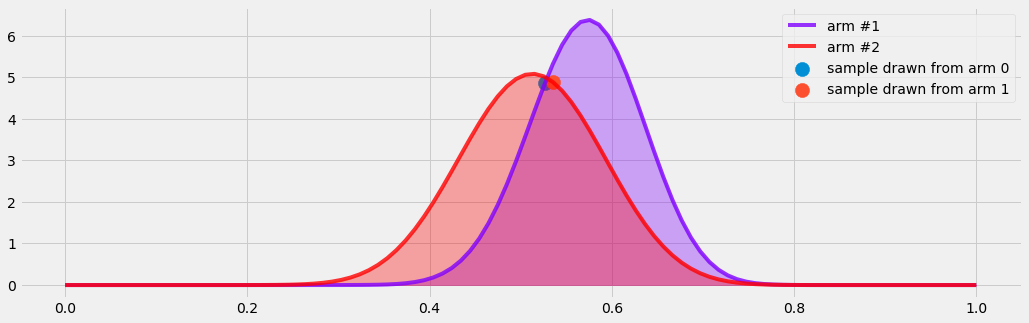

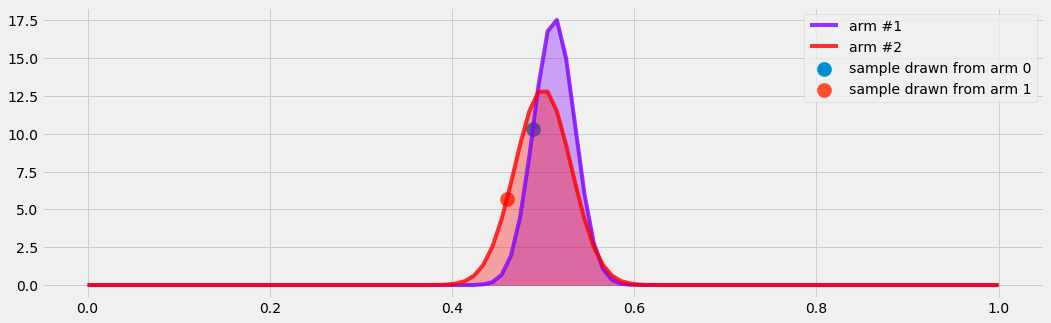

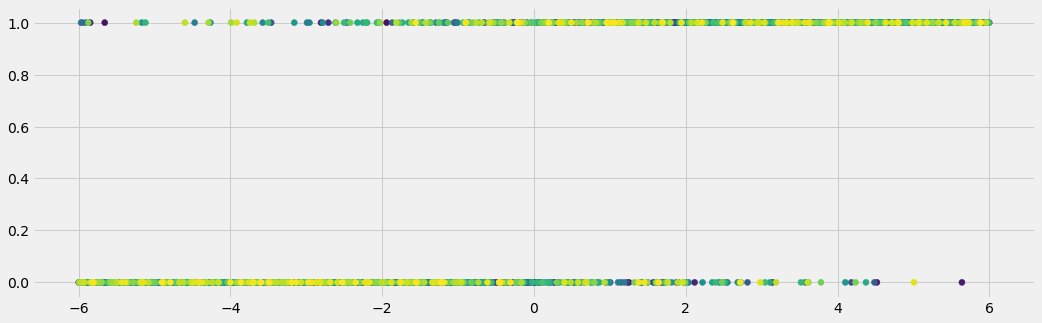

In [9]:
bb = BetaBandit()

y_hat_list = []
y_optimal_list = []

for i in progress_bar(range(num_data)):
    context = X[i]
    if i  in [0,5,10, 100, num_data//2, num_data]:
        plt.figure()
        arm = bb.choose_arm_and_plot()
    else:
        arm = bb.choose_arm()
    y_hat = contextual_categorical_bandit(context,arm, theta_contextual,noise)[0]
    y_hat_list += [y_hat]
    bb.update(arm, y_hat)
    y_optimal = contextual_categorical_bandit(context, contextual_categorical_get_optimal_arm(context), theta_contextual, noise)[0]
    y_optimal_list.append(y_optimal)


plt.figure()
plt.scatter(X,np.array(y_hat_list),c=range(len(y_hat_list)))




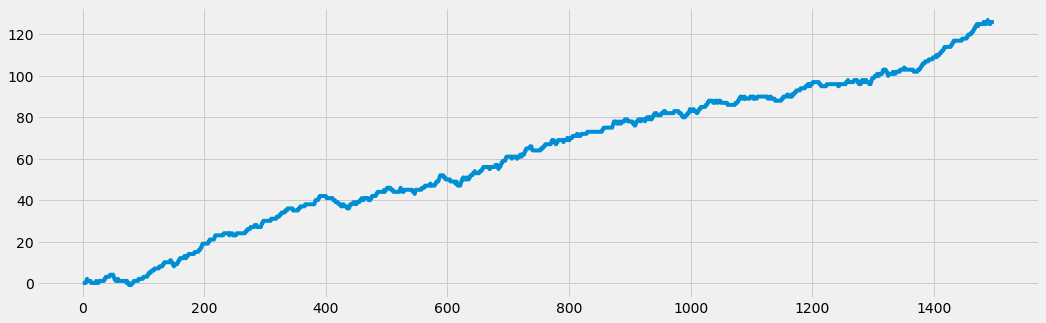

In [10]:
plot_regret(y_optimal_list, y_hat_list)

### contextual solver

In [11]:
from thompson_sampling.models import OnlineLogisticRegression
from thompson_sampling.solvers import LogisticThompsonSampler

In [12]:
lts = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 1)

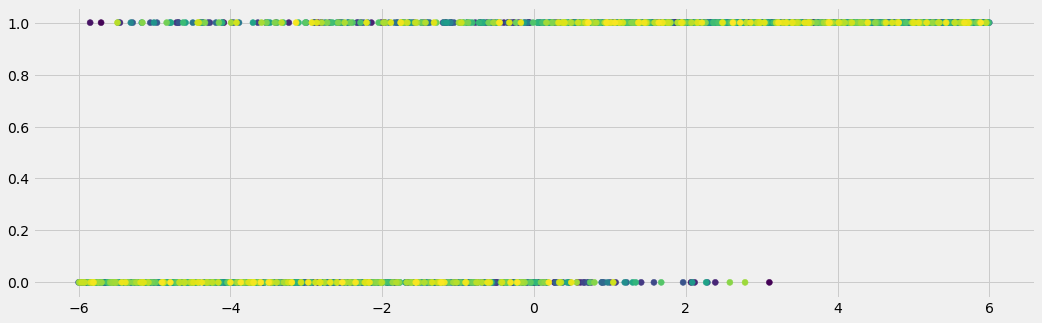

In [13]:
y_hat_list = []
y_optimal_list = []
arms = []

for i in progress_bar(range(num_data)):
    context = X[i]
    

    arm = lts.choose_arm(context)
        
    arms.append(arm)

    y_hat = contextual_categorical_bandit(context,arm, theta_contextual,noise)[0]
    y_hat_list += [y_hat]

    lts.update(arm, context, y_hat)

    y_optimal = contextual_categorical_bandit(context, contextual_categorical_get_optimal_arm(context), theta_contextual, noise)[0]
    y_optimal_list.append(y_optimal)
plt.figure()
plt.scatter(X,np.array(y_hat_list),c=range(len(y_hat_list)))



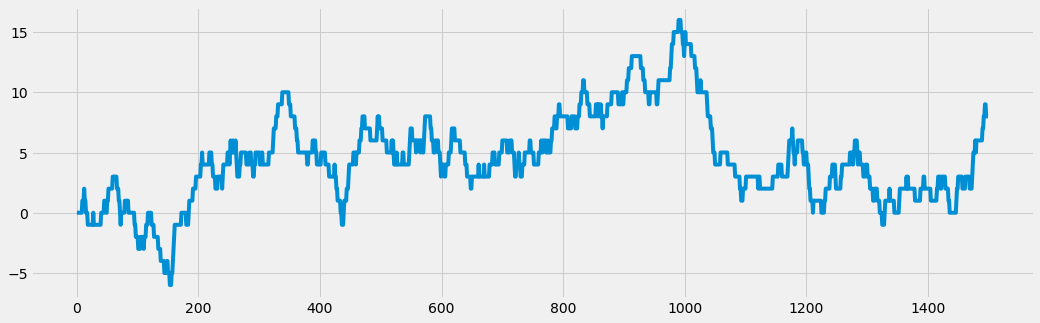

In [14]:
plot_regret(y_optimal_list, y_hat_list)

# nbdev stuff

In [15]:
! nbdev_build_lib

Converted 00_abstractions.ipynb.
Converted 01_multi_armed_bandits.ipynb.
Converted 02_models.ipynb.
Converted 03_ensembles.ipynb.
Converted 04_solvers.ipynb.
Converted 99_helpers.ipynb.
Converted contextual_bandits.ipynb.
Converted index.ipynb.
Converted noncontextual_bandits.ipynb.
Converted nonlinear_bandits-Copy1.ipynb.
Converted nonlinear_bandits.ipynb.


In [16]:

from nbdev.export import *
notebook2script()

Converted 00_abstractions.ipynb.
Converted 01_multi_armed_bandits.ipynb.
Converted 02_models.ipynb.
Converted 03_ensembles.ipynb.
Converted 04_solvers.ipynb.
Converted 99_helpers.ipynb.
Converted contextual_bandits.ipynb.
Converted index.ipynb.
Converted noncontextual_bandits.ipynb.
Converted nonlinear_bandits-Copy1.ipynb.
Converted nonlinear_bandits.ipynb.


In [17]:
! nbdev_build_docs

converting: /home/thomas/Documents/GitHub/thompson_sampling/index.ipynb
converting /home/thomas/Documents/GitHub/thompson_sampling/index.ipynb to README.md


In [18]:
! nbdev_install_git_hooks

Executing: git config --local include.path ../.gitconfig
Success: hooks are installed and repo's .gitconfig is now trusted


In [19]:
# nbdev_fix_merge filename.ipynb